In [45]:
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

### Reading in the datafile 

In [ ]:
df = pd.read_csv("C:/aryaman/coding/Dataset for Industry Intern Assignment - Plant-based Dairy - Plant-based dairy product launches.csv")

In [28]:
df_new = df.drop( columns = ["Manufactured by "]) # Removing column with too few entries

## Getting info on the data

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Product Name                                  151 non-null    object 
 1   Brands                                        151 non-null    object 
 2   Sector                                        151 non-null    object 
 3   Animal product replicated                     151 non-null    object 
 4   Product Format                                151 non-null    object 
 5   Price (INR)                                   136 non-null    float64
 6   Weight (Gms for meat and eggs, mL for dairy)  136 non-null    float64
 7   Price Per kg/L                                136 non-null    float64
 8   Shelf life                                    137 non-null    object 
 9   Storage Condtions                             97 non-null     obj

### Checking the first few entries

In [31]:
df_new.head()

,Product Name,Brands,Sector,Animal product replicated,Product Format,Price (INR),"Weight (Gms for meat and eggs, mL for dairy)",Price Per kg/L,Shelf life,Storage Condtions,Consumption Format,Ingredient list,Length of ingredient list
0,So Good Almond and Coconut,So Good,Plant- based dairy,Milk,Almond Milk,275.0,1000.0,275.0,12 Months,Ambient,NaN,"Filtered water, almonds (2.5%), coconut cream (1%), mineral (calcium), emuls...",13.0
1,Sheese,Sheese,Plant- based dairy,Cheese,Cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,White Cub Magic of Chocolate Icecream Dairy Free(500ml),White Cub,Plant- based dairy,Icecream,Ice cream,150.0,200.0,750.0,6 months,Frozen,NaN,"Soy mylk, Premium Cocoa powder, Coconut cream and sweetened with stevia",3.0
3,"Epigamia almond milk, unsweetened",Epigamia,Plant- based dairy,Milk,Almond Milk,250.0,1000.0,250.0,6 Months,Ambient,Ready To Drink,"Water, Almond, Emulsifier [INS 322 (i)], Stabilizer (INS 418), Tri Calcium P...",6.0
4,Sheese,Sheese,Plant- based dairy,Cheese,Cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking brand repetition

In [32]:
brand_count = df_new.value_counts("Brands")
brand_count

Brands
Nomou          15
White Cub      11
One Good        7
1Ness           7
Katharos        6
               ..
Nurrish         1
BVegan          1
Milkin Oats     1
MilkLab         1
Oatey           1
Length: 45, dtype: int64

Checking if a brand includes repeated product types (animal product replicates)

In [81]:
brand_nomou = df_new[df_new["Brands"] == "Nomou"]
brand_nomou

,Product Name,Brands,Sector,Animal product replicated,Product Format,Price (INR),"Weight (Gms for meat and eggs, mL for dairy)",Price Per kg/L,Shelf life,Storage Condtions,Consumption Format,Ingredient list,Length of ingredient list
36,Nomou Plant Based Fig & Walnut (SugarFree) Gelato,Nomou,Plant- based dairy,Icecream,Ice cream,525.0,500.0,1050.0,3 Months,Frozen,NaN,"Coconut Milk, Coconut Cream, Fig, Walnut\r\n",4.0
45,Nomou Plant Based Fresh Mango Gelato,Nomou,Plant- based dairy,Icecream,Ice cream,525.0,500.0,1050.0,3 Months,Frozen,NaN,"Coconut Milk, Coconut Cream, Palm Sugar, Fresh Alphonso Mangoe",4.0
47,Nomou Plant Based Nutella Gelato,Nomou,Plant- based dairy,Icecream,Ice cream,525.0,500.0,1050.0,3 Months,Frozen,NaN,"Coconut Milk, Coconut Cream, Palm Sugar, Chocolate Hazelnut Spread\r",4.0
53,Nomou Plant Based Fresh Strawberry Gelato,Nomou,Plant- based dairy,Icecream,Ice cream,525.0,500.0,1050.0,3 Months,Frozen,NaN,"Coconut Milk, Coconut Cream, Palm Sugar, Fresh Strawberries.",4.0
55,Nomou Plant Based Paan Gelato,Nomou,Plant- based dairy,Icecream,Ice cream,525.0,500.0,1050.0,3 Months,Frozen,NaN,"Coconut Milk, Coconut Cream, Palm Sugar, Paan Syrup, Paan Masala and Gulkand",5.0
63,Nomou Plant Based Saffron Pistachio Gelato,Nomou,Plant- based dairy,Icecream,Ice cream,525.0,500.0,1050.0,3 Months,Frozen,NaN,"Soya Milk, Cashew, Palm Sugar, Saffron Extract, Pistachio",5.0
69,Nomou Plant Based Choco Almond Gelato,Nomou,Plant- based dairy,Icecream,Ice cream,525.0,500.0,1050.0,3 Months,Frozen,NaN,"Coconut Milk, Coconut Cream, Palm Sugar, Cocoa Powder, Almonds",5.0
70,Nomou Plant Based Tender Coconut Gelato,Nomou,Plant- based dairy,Icecream,Ice cream,525.0,500.0,1050.0,3 Months,Frozen,NaN,"Coconut Milk, Coconut Cream, Palm Sugar, Tender Coconut Meat",4.0
82,Nomou Plant Based Gelato Bourbon Vanilla,Nomou,Plant- based dairy,Icecream,Ice cream,525.0,500.0,1050.0,3 Months,Frozen,NaN,"Soya Milk, Coconut Cream, Organic Raw Sugar, Vanilla Extract",4.0
84,Nomou Plant Based Lotus Biscoff Gelato,Nomou,Plant- based dairy,Icecream,Ice cream,525.0,500.0,1050.0,3 Months,Frozen,NaN,"Coconut Milk, Coconut Cream, Palm Sugar, Lotus Biscoff Spread, Lotus Biscoff...",5.0


Nomou has 15 types of ice cream

## What quantity of each animal product does a brand offeer

In [82]:
brand_type_counts = df_new.groupby(["Brands", "Animal product replicated"]).size().reset_index(name = "counts") 
#grouping the brands and products to gain a count 
brand_type_counts                                                                                                    

,Brands,Animal product replicated,counts
0,1Ness,Butter,2
1,1Ness,Cheese,2
2,1Ness,Milk,2
3,1Ness,Yogurt,1
4,Alt Company,Milk,1
...,...,...,...
55,UFC Velvet,Milk,2
56,Urban Platter,Cheese,1
57,Urban Platter,Milk,2
58,White Cub,Curd,1


Most product offerings by a brand (based on aninmal product replicated)

In [89]:
brand_type_count = df.groupby("Brands")["Animal product replicated"].nunique().sort_values(ascending=False)
brand_type_count

Brands
One Good         5
1Ness            4
Plantaway        3
Epigamia         2
Urban Platter    2
One Good         2
Homecraft        2
White Cub        2
Drupe Power      2
Silk             1
Name: Animal product replicated, dtype: int64

In [87]:
#2 or more types
two_and_more = (brand_type_count >= 2).sum()
two_and_more

9

Only 9 brands have 2 or more distinct product offerings

### Getting top 5 brands (by number of distinct offerings) graph

C:\Users\tayal\AppData\Local\Temp\ipykernel_20764\834609737.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top5.index, y=top5.values, palette='pastel')


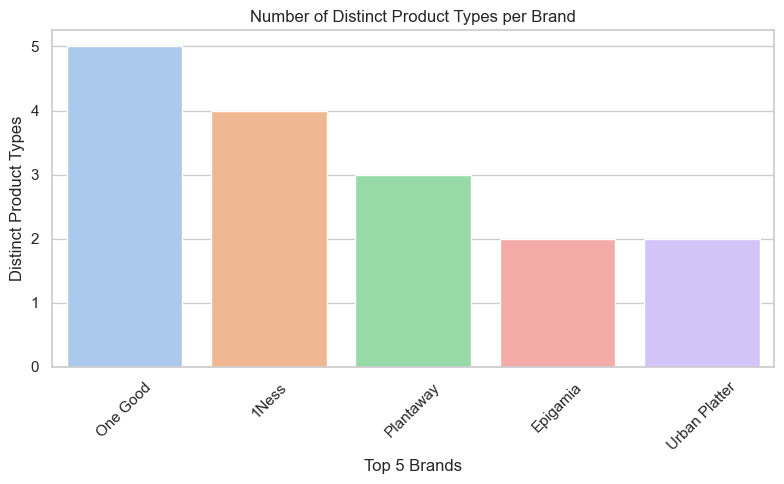

In [70]:
top5 = brand_type_count.head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x= top5.index, y=top5.values, palette='pastel')

plt.title('Number of Distinct Product Types per Brand')
plt.xlabel('Top 5 Brands')
plt.ylabel('Distinct Product Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top5.png", dpi = 300, bbox_inches = "tight")

One Good is the biggest brand in terms of number of distinct offerings

In [63]:
df_new[df["Brands"] == "One Good"]["Animal product replicated"].unique()

array(['Cheese', 'Milk', 'Mayonaisse', 'Paneer', 'Butter'], dtype=object)

...  



## Checking product types and plotting a pie chart

In [36]:
type_count = df_new.value_counts("Animal product replicated")
type_count

Animal product replicated
Milk          66
Icecream      46
Cheese        26
Butter         7
Yogurt         2
Curd           1
Ghee           1
Mayonaisse     1
Paneer         1
dtype: int64

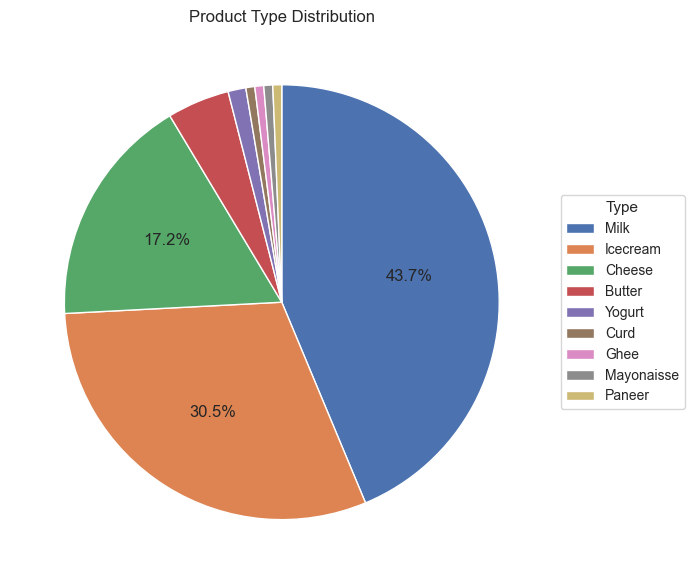

In [64]:
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 5 else ''  # To avoid overlapping numbers

fig, ax = plt.subplots()
type_count.plot.pie(
    ax=ax,
    labels=None,
    autopct=autopct_format,
    startangle=90,
    counterclock=False,
    shadow=False,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'} 
)

ax.set_ylabel("")
ax.set_title("Product Type Distribution", fontsize=12)
plt.legend(
    type_count.index,
    title="Type",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=11
)
plt.tight_layout()
plt.savefig("pie_chart.png", dpi=300, bbox_inches='tight')

Plotting a horizontal bar for the same

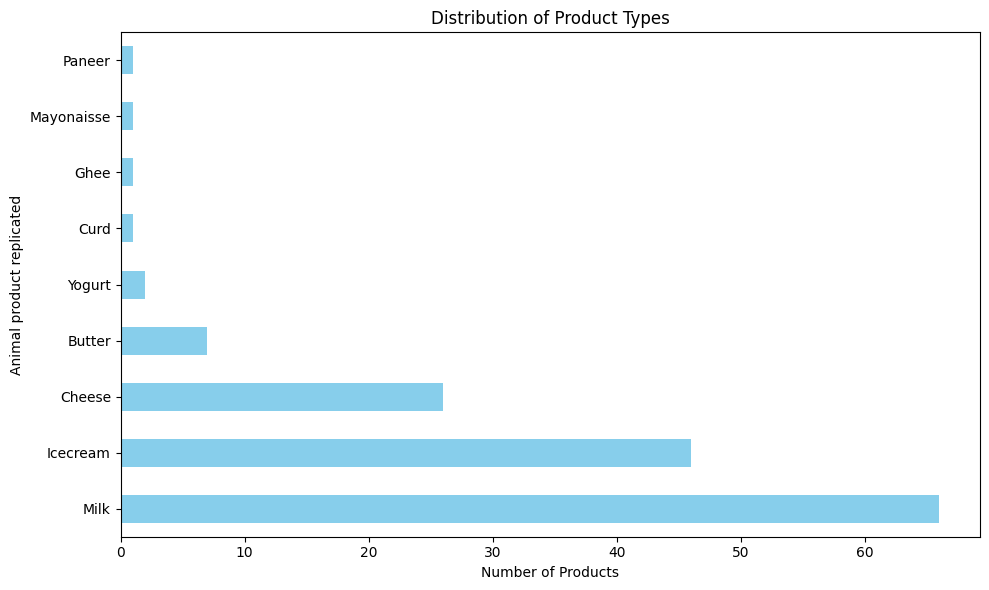

In [43]:
type_count.plot.barh(color="skyblue")
plt.xlabel("Number of Products")
plt.title("Distribution of Product Types")
plt.tight_layout()
plt.show()

Milk is the most popoular product followed by Icecream in the plant-based dairy sector

## Getting avg price in each category

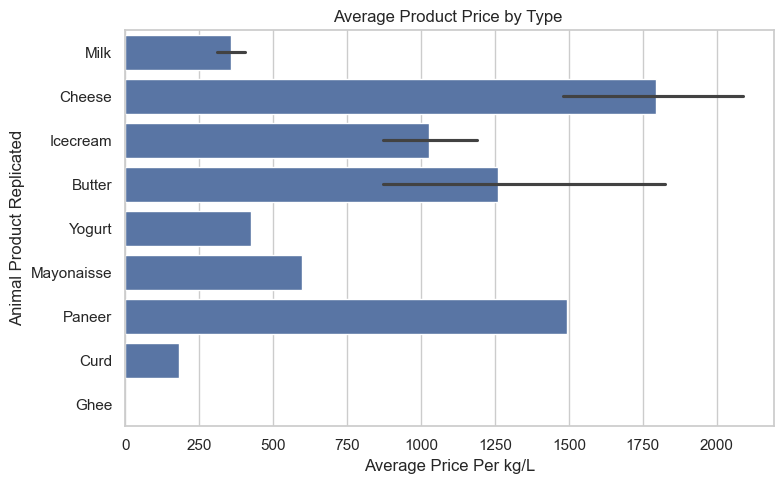

In [79]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Horizontal bar plot. It plots mean price with 95% confidence interval
sns.barplot(
    data=df_new,
    y="Animal product replicated",          
    x="Price Per kg/L",                 
    errorbar="ci"      
)

plt.title("Average Product Price by Type ")
plt.xlabel("Average Price Per kg/L")
plt.ylabel("Animal Product Replicated")
plt.tight_layout()
plt.savefig("avg_price.png", dpi=300, bbox_inches='tight')

Cheese is the most expensive product, followed by Paneer and Butter. Butter has the highest standard deviation in prices

## Obtaining the max and min price under each product category

In [80]:
# Clean missing data
df_clean = df_new.dropna(subset=['Price Per kg/L', 'Animal product replicated'])

# Get index of max and min price per product type
idx_max = df_clean.groupby('Animal product replicated')['Price Per kg/L'].idxmax()
idx_min = df_clean.groupby('Animal product replicated')['Price Per kg/L'].idxmin()

# Getting only the relevant rows
max_prices = df_clean.loc[idx_max][['Animal product replicated', 'Brands', 'Price Per kg/L']]
min_prices = df_clean.loc[idx_min][['Animal product replicated', 'Brands', 'Price Per kg/L']]

# Rename columns for clarity. Passing a dictionary to rename columns
max_prices = max_prices.rename(columns={
    'Brands': 'Max Brand',
    'Price Per kg/L': 'Max Price Per kg/L'
})
min_prices = min_prices.rename(columns={
    'Brands': 'Min Brand',
    'Price Per kg/L': 'Min Price Per kg/L'
})

# Merging both on the product replicated column
price_summary = pd.merge(max_prices, min_prices, on='Animal product replicated')

print(price_summary)



  Animal product replicated    Max Brand  Max Price Per kg/L   Min Brand  \
0                    Butter  Drupe Power              2375.0    One Good   
1                    Cheese     Softspot              2800.0    One Good   
2                      Curd   White Cub                180.0  White Cub    
3                  Icecream     Minus 30              2600.0  White Cub    
4                Mayonaisse     One Good               596.0    One Good   
5                      Milk        Sain                895.0      BVegan   
6                    Paneer     One Good              1495.0    One Good   
7                    Yogurt        1Ness               425.0       1Ness   

   Min Price Per kg/L  
0               700.0  
1               334.0  
2               180.0  
3               300.0  
4               596.0  
5               110.0  
6              1495.0  
7               425.0  


Getting graph of this to compare max and min prices in each category

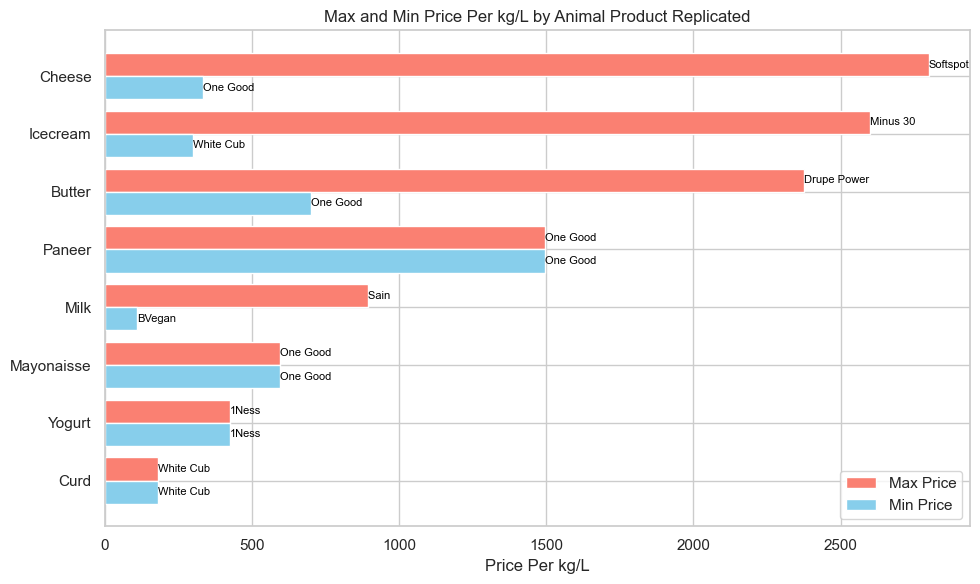

In [78]:
price_summary_sorted = price_summary.sort_values(by="Max Price Per kg/L", ascending=True)

# Setup positions
y_pos = np.arange(len(price_summary_sorted))

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot max and min prices
ax.barh(y_pos + 0.2, price_summary_sorted['Max Price Per kg/L'], height=0.4, label='Max Price', color='salmon')
ax.barh(y_pos - 0.2, price_summary_sorted['Min Price Per kg/L'], height=0.4, label='Min Price', color='skyblue')

# Annotate brand names on the bars
for i, (max_brand, max_price, min_brand, min_price) in enumerate(zip(
    price_summary_sorted['Max Brand'],
    price_summary_sorted['Max Price Per kg/L'],
    price_summary_sorted['Min Brand'],
    price_summary_sorted['Min Price Per kg/L'])):
    
    ax.text(max_price + 0.2, y_pos[i] + 0.2, max_brand, va='center', fontsize=8, color='black')
    ax.text(min_price + 0.2, y_pos[i] - 0.2, min_brand, va='center', fontsize=8, color='black')

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(price_summary_sorted['Animal product replicated'])

# Labels and legend
ax.set_xlabel('Price Per kg/L')
ax.set_title('Max and Min Price Per kg/L by Animal Product Replicated')
ax.legend()

plt.tight_layout()
plt.savefig("price_graph", dpi = 300, bbox_inches = 'tight')
plt.show()
